In [125]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IA.utils import mapping, parameter_range
from scipy import stats
import math
from pathlib import Path
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("analysis/not_uploaded/IA/TID/.scratch.ckpts.IA.pexels.scores-one.change_regress.epoch-9.pth.txt")
mos = pd.read_csv("analysis/not_uploaded/mos_with_names.txt", sep=" ")

#df = df[df["img"].str.contains("_")]
df["img"] = df["img"].apply(lambda row: Path(row).stem)
df["img"] = df["img"].apply(lambda row: row.lower())
df["img"] = df["img"].apply(lambda row: row.split(".")[0])
df["img"] = df["img"].apply(lambda row: row if "_" in row else row+"_00_0")

mos["img"] = mos["img"].apply(lambda row: row.lower())
mos["img"] = mos["img"].apply(lambda row: row.split(".")[0])
mos["img"] = mos["img"].apply(lambda row: row if "_" in row else row+"_00_0")


df = df.set_index("img").join(mos.set_index("img"))
df = pd.DataFrame(df.to_records())

df["img_id"] = df["img"].apply(lambda row: int(row.split("_")[0][1:]))
df["distortion"] = df["img"].apply(lambda row: int(row.split("_")[1]))
df["dist_level"] = df["img"].apply(lambda row: int(row.split("_")[2]))

try:
    df["score"] = (df["styles_score"] + df["technical_score"] + df["composition_score"])/3
except:
    pass
df

,img,score,styles_contrast_strength,styles_brightness_strength,styles_saturation_strength,styles_shadows_strength,styles_highlights_strength,styles_exposure_strength,styles_vibrance_strength,styles_temperature_strength,...,composition_rotate_strength,composition_hcrop_strength,composition_vcrop_strength,composition_leftcornerscrop_strength,composition_rightcornerscrop_strength,composition_ratio_strength,MOSscore,img_id,distortion,dist_level
0,i20_13_4,0.231567,0.154907,0.027634,0.298584,-0.227173,1.369141,-0.061493,0.113098,-0.139404,...,-0.087097,0.351807,0.040161,0.027496,0.017654,-0.120972,2.89189,20,13,4
1,i08_07_3,0.440674,0.097839,0.017960,0.121521,-0.047516,0.013847,-0.059692,0.160522,0.019073,...,-0.012413,0.028030,-0.150024,-0.145264,-0.140503,0.587891,4.16667,8,7,3
2,i21_15_4,0.386475,-0.062073,0.013695,0.272949,-0.467041,0.205933,-0.028885,0.158936,0.303711,...,0.022675,-0.413818,-0.442383,-0.370850,-0.441406,0.092590,3.76190,21,15,4
3,i15_08_3,0.459961,0.067383,0.190308,0.086243,-0.221069,0.490967,0.084717,0.157715,-0.261719,...,0.083557,0.130005,-0.313477,-0.320312,-0.311768,-0.553223,5.13636,15,8,3
4,i02_05_5,0.072388,0.888672,-0.697754,-0.236938,-0.828613,0.367676,-0.034393,0.060242,0.291504,...,-0.173096,-0.287598,-0.127075,-0.188843,-0.148560,-0.387451,3.41667,2,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3020,i07_04_5,0.288086,-0.223145,0.524902,-0.505371,0.169556,0.385986,0.064758,-0.021896,-0.117859,...,0.000958,-0.108948,-0.165894,-0.154663,-0.103516,0.203613,4.20930,7,4,5
3021,i16_13_5,0.349609,0.245117,-0.247925,-0.078125,-0.563477,0.054840,-0.136597,0.130371,0.128418,...,0.020264,-0.028198,-0.199707,-0.194702,-0.185669,0.173584,3.62500,16,13,5
3022,i11_15_4,0.800293,0.247681,-0.269287,0.170654,-0.438477,0.097107,-0.097778,0.137085,-0.198364,...,0.033325,-0.096008,-0.160889,-0.187500,-0.176392,-0.083069,3.67568,11,15,4
3023,i06_15_5,0.245972,0.236328,-0.006676,0.023468,-0.162964,0.177490,0.333496,0.081177,-0.156738,...,-0.013863,0.014992,0.009598,0.043365,0.001648,0.206787,4.83333,6,15,5


In [3]:
def histogram_distortion(distortion:int, score:str):
    plot_frame = df[(df["distortion"] == distortion) | (df["distortion"] == 0)]
    for dist_level in range(6):
        sns.distplot(plot_frame[(plot_frame["dist_level"] == dist_level)][score], label=f"{distortion}: {dist_level}")
    plt.legend()

In [4]:
def violin_distortion(distortion:int, score:str):
    plot_frame = df[(df["distortion"] == distortion) | (df["distortion"] == 0)]
    sns.violinplot(data=plot_frame, x="dist_level", y=score, color="steelblue")
    plt.legend()

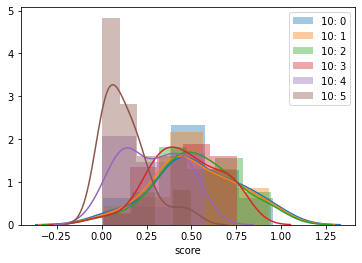

In [5]:
histogram_distortion(10, "score")

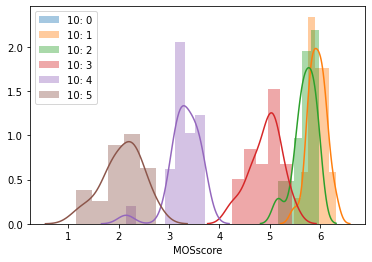

In [9]:
histogram_distortion(10, "MOSscore")

No handles with labels found to put in legend.


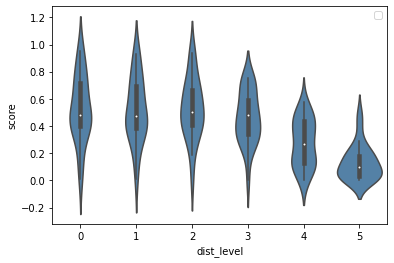

In [10]:
violin_distortion(10, "score")

No handles with labels found to put in legend.


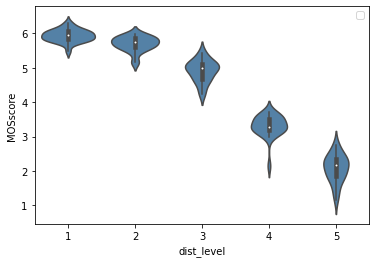

In [8]:
violin_distortion(10, "MOSscore")

In [11]:
for dist in range(1, 25):
    results = []
    for img in range(1,26):
        results.append(stats.spearmanr(df[(df["img_id"] == img) & (df["distortion"] == dist)]["dist_level"], df[(df["img_id"] == img) & (df["distortion"] == dist)]["score"]))
    print(dist,"\t", sum([val[0] for val in results])/25)

1 	 -0.23199999999999993
2 	 -0.244
3 	 -0.3479999999999999
4 	 -0.23436369692919215
5 	 -0.26
6 	 -0.31999999999999995
7 	 -0.4740519567041704
8 	 -0.27199999999999996
9 	 -0.4359999999999999
10 	 -0.8079999999999999
11 	 -0.4962078268166812
12 	 -0.21600000000000005
13 	 -0.29999999999999993
14 	 -0.10483130726672493
15 	 0.023999999999999976
16 	 -0.12176652794179046
17 	 -0.184
18 	 -0.0039999999999999905
19 	 -0.28781848464596077
20 	 -0.43199999999999994
21 	 -0.45199999999999996
22 	 -0.484
23 	 -0.1219480432958297
24 	 -0.5207273938583842


In [12]:
for dist in range(1, 25):
    results = []
    for img in range(1,26):
        results.append(stats.spearmanr(df[(df["img_id"] == img) & (df["distortion"] == dist)]["dist_level"], df[(df["img_id"] == img) & (df["distortion"] == dist)]["MOSscore"]))
    print(dist,"\t", sum([val[0] for val in results])/25)

1 	 -0.9839999999999999
2 	 -0.9359999999999999
3 	 -0.9999999999999999
4 	 -0.9408313072667248
5 	 -0.9719999999999999
6 	 -0.996
7 	 -0.9959999999999998
8 	 -0.996
9 	 -0.9829871773792357
10 	 -0.9999999999999999
11 	 -0.9949871773792357
12 	 -0.8959999999999998
13 	 -0.9159999999999998
14 	 -0.8778704413501309
15 	 0.7728313072667247
16 	 -0.8719999999999999
17 	 -0.49467543715421414
18 	 -0.9639999999999997
19 	 -0.9829871773792358
20 	 -0.9399999999999997
21 	 -0.9959999999999998
22 	 -0.9919999999999999
23 	 -0.9179743547584716
24 	 -0.996


In [13]:
for dist in range(1, 25):
    results = []
    for img in range(1,26):
        results.append(stats.spearmanr(df[(df["img_id"] == img) & (df["distortion"] == dist)]["MOSscore"], df[(df["img_id"] == img) & (df["distortion"] == dist)]["score"]))
    print(dist,"\t", sum([val[0] for val in results])/25)

1 	 0.23199999999999993
2 	 0.20799999999999996
3 	 0.3479999999999999
4 	 0.23968825977497812
5 	 0.27999999999999997
6 	 0.31599999999999995
7 	 0.48605195670417034
8 	 0.27599999999999997
9 	 0.4466754371542139
10 	 0.8079999999999999
11 	 0.4884156536333624
12 	 0.172
13 	 0.31599999999999995
14 	 0.10483130726672493
15 	 -0.0031686927332750824
16 	 0.16361065782927953
17 	 0.26667543715421393
18 	 0.04
19 	 0.2787260441088302
20 	 0.40399999999999997
21 	 0.44799999999999995
22 	 0.49199999999999994
23 	 0.07394804329582967
24 	 0.5167273938583842


In [6]:
stats.spearmanr(df[["MOSscore", "score"]].dropna())

SpearmanrResult(correlation=0.2500906289800148, pvalue=5.208556422667686e-44)

In [171]:
features = [c for c in df.columns if c not in ["index", "img","score", "img_id", "distortion", "dist_level"]]
reg_df = df.dropna()
train = reg_df[reg_df["img_id"] <= 15].reset_index()[features]
test = reg_df[reg_df["img_id"] > 15].reset_index()[features]

In [172]:
reg = svm.NuSVR().fit(train.drop(columns=["MOSscore"]), train["MOSscore"])
reg.score(train.drop(columns=["MOSscore"]), train["MOSscore"])

0.5947685340726296

In [173]:
reg.score(test.drop(columns=["MOSscore"]), test["MOSscore"])

-0.331197613060753

In [174]:
reg.predict(test.drop(columns=["MOSscore"]))

array([3.49310131, 4.32336065, 4.46587578, ..., 4.52963153, 4.71966301,
       3.88419566])

In [177]:
stats.pearsonr(reg.predict(test.drop(columns=["MOSscore"])), test["MOSscore"])

(0.21205859605201222, 1.1462973525659524e-13)

In [183]:
df[~df["img"].str.contains("00_0")].sort_values(by="img").reset_index()[["score","img"]].to_csv("analysis/not_uploaded/IA/TID/pred_scores", index=False, sep=" ")